## Import Statements

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [130]:
df = pd.read_csv(filepath_or_buffer="data/query_results.csv", names=["date", "tag", "posts"], skiprows=1)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [131]:
df.head()

,date,tag,posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


In [132]:
df.tail()

,date,tag,posts
2644,2024-06-01 00:00:00,php,997
2645,2024-06-01 00:00:00,python,5276
2646,2024-06-01 00:00:00,r,1118
2647,2024-06-01 00:00:00,ruby,112
2648,2024-06-01 00:00:00,swift,602


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [133]:
df.shape

(2649, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [134]:
df.count()

date     2649
tag      2649
posts    2649
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [135]:
df.groupby("tag").sum().sort_values(by="posts", ascending=False)

,posts
tag,
javascript,2529596
python,2198952
java,1917653
c#,1618035
php,1465542
c++,808619
r,507297
c,405043
swift,334106


**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [136]:
df.groupby("tag").count().sort_values(by="date")

,date,posts
tag,,
go,176,176
swift,182,182
r,189,189
assembly,191,191
c,191,191
c++,191,191
delphi,191,191
java,191,191
javascript,191,191


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [137]:
df.date.head()

0    2008-07-01 00:00:00
1    2008-08-01 00:00:00
2    2008-08-01 00:00:00
3    2008-08-01 00:00:00
4    2008-08-01 00:00:00
Name: date, dtype: object

In [138]:
df.date = pd.to_datetime(df.date)

In [139]:
df.date.head()

0   2008-07-01
1   2008-08-01
2   2008-08-01
3   2008-08-01
4   2008-08-01
Name: date, dtype: datetime64[ns]

## Data Manipulation



In [140]:
reshaped_df = df.pivot(index="date", columns="tag", values="posts")

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [141]:
reshaped_df.shape

(192, 14)

In [142]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='tag')

In [143]:
reshaped_df.head()

tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,503.0,164.0,13.0,NaN,222.0,161.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1127.0,633.0,130.0,474.0,536.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,806.0,112.0,NaN,1147.0,722.0,128.0,604.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [144]:
reshaped_df.count()

tag
assembly      191
c             191
c#            192
c++           191
delphi        191
go            176
java          191
javascript    191
perl          191
php           191
python        191
r             189
ruby          191
swift         182
dtype: int64

The reason is that the .count() method excludes NaN values. When we pivoted the DataFrame the NaN values were inserted when there were no posts for a language in that month.

In [145]:
reshaped_df.isna().values.any()

True

In [146]:
reshaped_df.fillna(0, inplace=True)

In [147]:
reshaped_df.isna().values.any()

False

In [148]:
reshaped_df.head()

tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,503.0,164.0,13.0,0.0,222.0,161.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1127.0,633.0,130.0,474.0,536.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,806.0,112.0,0.0,1147.0,722.0,128.0,604.0,505.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

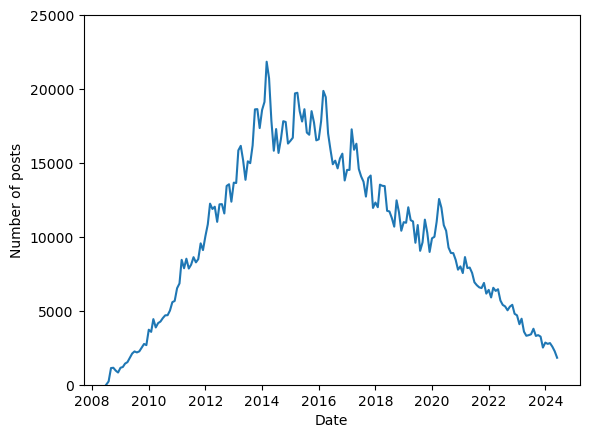

In [149]:
plt.xlabel("Date")
plt.ylabel("Number of posts")
plt.ylim(0, 25000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

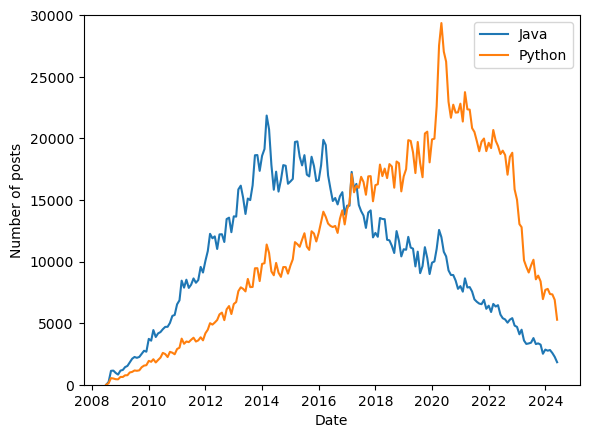

In [150]:
plt.xlabel("Date")
plt.ylabel("Number of posts")
plt.ylim(0, 30000)
plt.plot(reshaped_df.index, reshaped_df.java, label="Java")
plt.plot(reshaped_df.index, reshaped_df.python, label="Python")
plt.legend()

In [151]:
def plot_all_languages(df:pd.DataFrame):
    plt.figure(figsize=(12,6))
    plt.xlabel("Date")
    plt.ylabel("Number of posts")
    plt.ylim(0, 32000)
    for column in df.columns:
        plt.plot(df.index, df[column], label=df[column].name)
    plt.legend() 

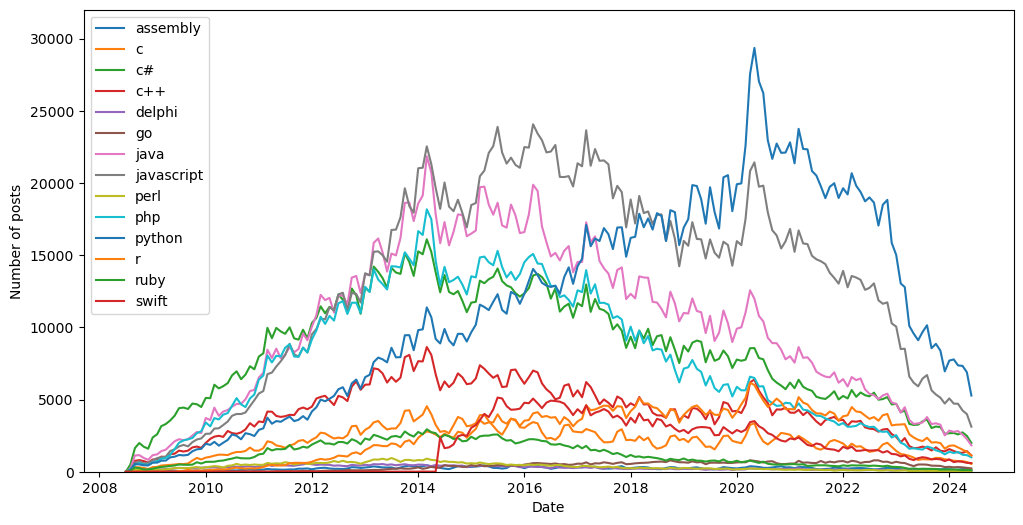

In [152]:
plot_all_languages(reshaped_df)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [153]:
roll_df_6 = reshaped_df.rolling(window=6).mean()

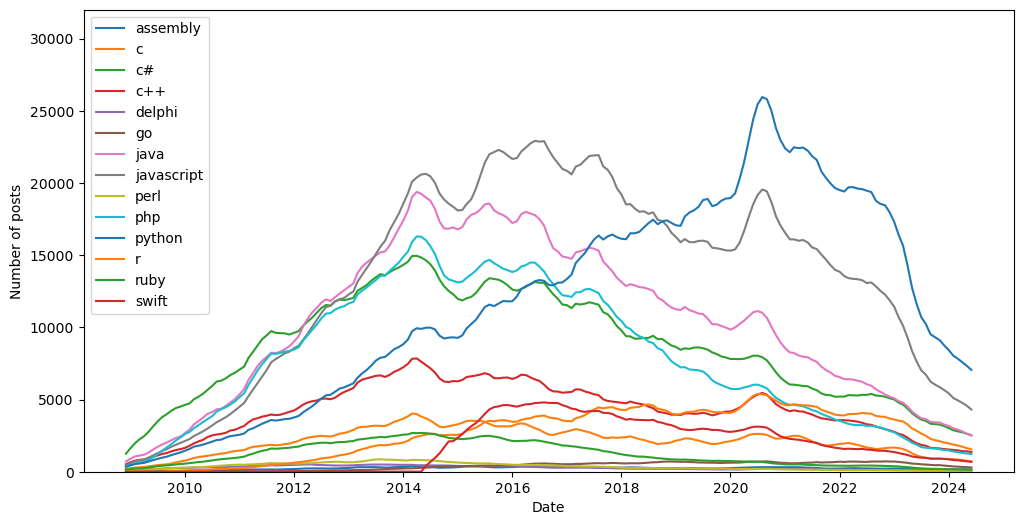

In [155]:
plot_all_languages(roll_df_6)

In [156]:
roll_df_3 = reshaped_df.rolling(window=3).mean()

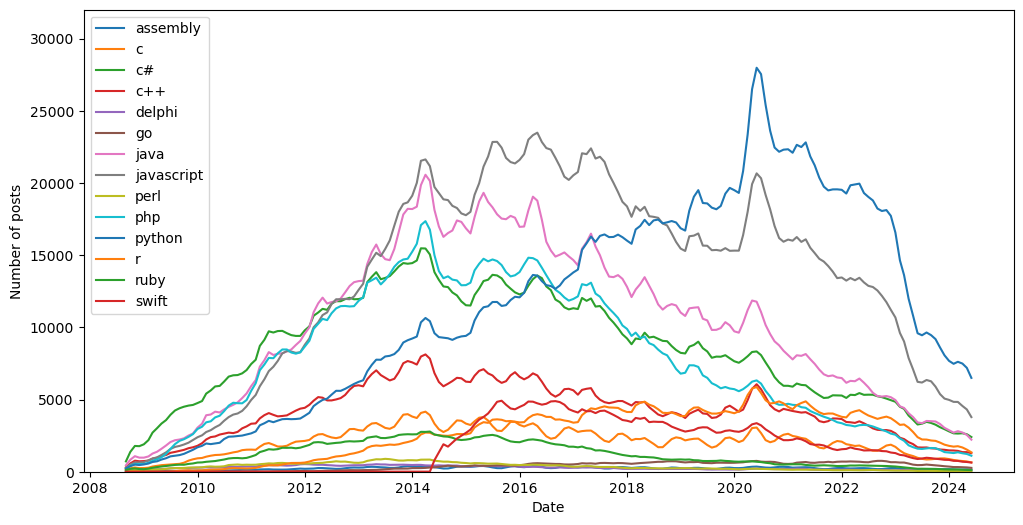

In [157]:
plot_all_languages(roll_df_3)

In [160]:
roll_df_12 = reshaped_df.rolling(window=12).mean()

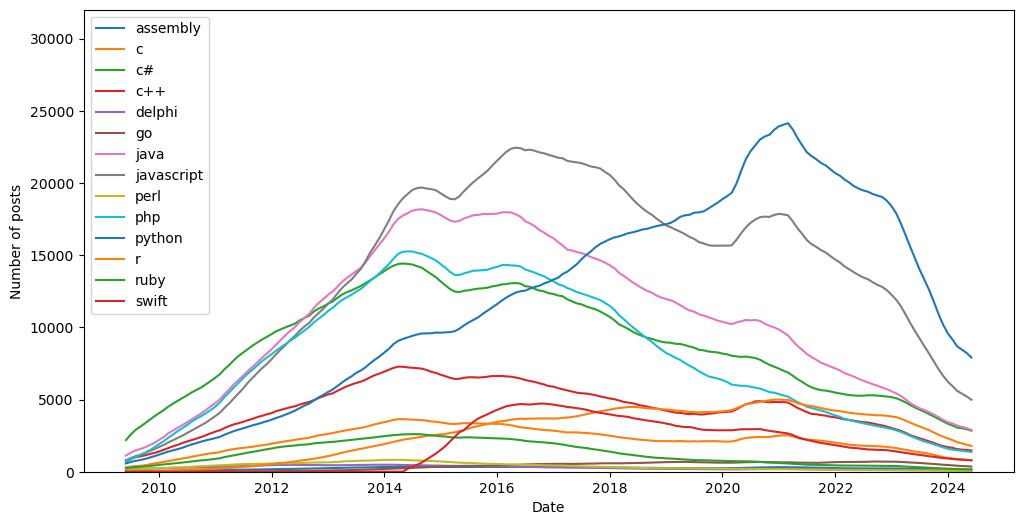

In [161]:
plot_all_languages(roll_df_12)

# Conclusion

- Python has been the most popular language since 2019
- In 2019 Python beat JavaScript - the leader since around 2013-2014
- Number of Python posts per month has been decreasing since 2021, may be connected to ChatGPT launch
- Top 4 current languages based on this dataset are: Python, JavaScript, Java, C#